In [1]:
import pandas as pd
import os

데이터 출처: https://www.kaggle.com/c/lspoons-homecredit/

In [2]:
os.chdir(r'C:\Users\arimi\00. 포트폴리오\data2')

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
lb = pd.read_csv("loan_before.csv")

In [4]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [5]:
lb.columns

Index(['SK_ID_CURR', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'CREDIT_TYPE'],
      dtype='object')

# 데이터 설명

- SK_ID_CURR : 유니크한 아이디
- TARGET : 타겟값(0:정상 상환, 1: 연체 혹은 문제가 생긴 경우)
- CODE_GENDER: 성별(0:여성, 1:남성)
- FLAG_OWN_CAR : 차 보유 여부(0:없음, 1:있음)
- FLAG_OWN_REALTY : 주택 혹은 아파트 보유 여부(0:없음, 1:있음)
- CNT_CHILDREN : 자녀수
- AMT_INCOME_TOTAL : 수입
- AMT_CREDIT : 대출금액
- AMT_ANNUITY : 1달 마다 갚아야하는 금액
- NAME_TYPE_SUITE : 대출신청을 할 때 누가 동행했는지       
- NAME_INCOME_TYPE : 직업종류
- NAME_EDUCATION_TYPE : 학위
- NAME_HOUSING_TYPE : 주거 상황
- REGION_POPULATION_RELATIVE : 지역의 인구
- DAYS_BIRTH : 나이
- DAYS_EMPLOYED : 언제 취업했는지(365243은 결측치)
- DAYS_ID_PUBLISH: 고객이 대출을 신청한 ID문서를 변경한 날짜
- OWN_CAR_AGE: 보유한 차의 나이
- CNT_FAM_MEMBERS: 가족수
- HOUR_APPR_PROCESS_START : 대출신청한 시간
- ORGANATION_TYPE: 일하는 조직의 종류
- EXT_SOURCE_1: 외부데이터1로부터의 신용점수
- EXT_SOURCE_2: 외부데이터2로부터의 신용점수
- EXT_SOURCE_3: 외부데이터3로부터의 신용점수
- DAYS_LAST_PHONE_CHANGE : 마지막 핸드폰을 바꾼 시기',
- AMT_REQ_CREDIT_BUREAU_YEAR :신청 전 1년간 신용평가기관에 해당 사람에 대한 신용 <br>
<br>
- SK_ID_CURR : 유니크한 아이디
- DAYS_CREDIT : 해당 대출이 home credit으로부터 받은 대출보다 며칠 이전에 일어났는지
- CNT_CREDIT_PROLONG : 대출 연장을 몇 번 했는지
- AMT_CREDIT_SUM : 대출 금액
- CREDIT_TYPE : 대출 유형

In [6]:
train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,162716,0,0.0,0,1,0,101250.0,480060.0,22509.0,Unaccompanied,...,-2256,NaN,2.0,15,Kindergarten,NaN,0.665732,NaN,-139.0,1.0
1,361317,0,0.0,0,1,2,225000.0,237024.0,12231.0,Unaccompanied,...,-4133,NaN,4.0,3,Business Entity Type 3,0.575699,0.535140,0.670652,-957.0,0.0
2,246925,0,1.0,0,0,0,171000.0,247675.5,26005.5,Unaccompanied,...,-4340,NaN,2.0,10,Business Entity Type 3,0.092273,0.002272,0.154744,-827.0,1.0
3,294331,0,1.0,1,0,0,225000.0,180000.0,9000.0,Unaccompanied,...,-1621,12.0,2.0,12,Trade: type 7,0.221815,0.120444,NaN,-569.0,2.0
4,152173,0,0.0,0,1,0,180000.0,337500.0,12852.0,Unaccompanied,...,-2870,NaN,1.0,12,XNA,NaN,0.722415,0.723837,-1544.0,4.0


# 1. 문제정의

<strong>질문 1</strong> - 어떤 요소가 대출금 상환 여부에 큰 영향을 줄까? <br>
<strong>질문 2</strong> - 그 요소들이 상환여부에 어떤 영향을 줄까?

# 2. 방법론

## 2.1 분석과정

이 질문에 대한 해답을 얻기 위해서 해석가능한 머신러닝을 활용하였다.

<strong>프로세스</strong>

1단계 : feature engineering을 한다.<br>
2단계 : 머신러닝 모델을 만든다.<br>
3단계 : shap value를 통해 어떤 변수가 가장 큰 영향을 주는지 알아본다.<br>
4단계 : 영향을 많이 주는 5개의 변수와 대출금 상환 여부와의 관계를 살펴본다.

## 2.2 feature engineering

AMT_CREDIT에서 AMT_ANNUITY를 나누어 해당 사람이 몇 개월에 걸쳐 돈을 갚아야 하는지 변수화하였다.

In [7]:
train['AMT_CREDIT_TO_ANNUITY_RATIO'] = train['AMT_CREDIT']/train['AMT_ANNUITY']
test['AMT_CREDIT_TO_ANNUITY_RATIO'] = test['AMT_CREDIT']/test['AMT_ANNUITY']

lb(이전에 대출한 정보가 기록된 데이터)를 활용해 변수생성을 시도한다.
<br>

<strong>1. groupby 후 평균(사람 id로 묶은 후 각 변수를 평균을 낸다)</strong><br>
<ul>
    <li>AMT_CREDIT_SUM(이전 대출의 금액)</li>
    <li>DAYS_CREDIT(train,test로부터 며칠 전에 이전 대출을 진행했는지)</li>
    <li>CNT_CREDIT_PROLONG(대출연장을 몇 번 했는지)</li>
</ul>
 
<strong>2. groupby 후 갯수(사람 id별로의 빈도수, 해당 사람이 이전에 대출을 몇 번 진행했는지)</strong>

In [8]:
lb.head()

,SK_ID_CURR,DAYS_CREDIT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,CREDIT_TYPE
0,400486,-2413,0,180000.0,Consumer credit
1,400486,-941,0,40500.0,Credit card
2,400486,-1110,0,114727.5,Consumer credit
3,400486,-2133,0,225000.0,Consumer credit
4,400486,-391,0,142290.0,Consumer credit


In [9]:
train = pd.merge( train,lb.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM'].mean().reset_index(),on='SK_ID_CURR',how='left' )
test = pd.merge( test,lb.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM'].mean().reset_index(),on='SK_ID_CURR',how='left' )

train = pd.merge( train,lb.groupby(['SK_ID_CURR'])['DAYS_CREDIT'].mean().reset_index(),on='SK_ID_CURR',how='left' )
test = pd.merge( test,lb.groupby(['SK_ID_CURR'])['DAYS_CREDIT'].mean().reset_index(),on='SK_ID_CURR',how='left' )

train = pd.merge( train,lb.groupby(['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index(),on='SK_ID_CURR',how='left' )
test = pd.merge( test,lb.groupby(['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index(),on='SK_ID_CURR',how='left' )

In [10]:
train = pd.merge(train , lb.groupby(['SK_ID_CURR']).size().reset_index().rename(columns={0:'count'}),on='SK_ID_CURR', how='left')
test = pd.merge(test , lb.groupby(['SK_ID_CURR']).size().reset_index().rename(columns={0:'count'}),on='SK_ID_CURR', how='left')

In [11]:
train

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_TO_ANNUITY_RATIO,AMT_CREDIT_SUM,DAYS_CREDIT,CNT_CREDIT_PROLONG,count
0,162716,0,0.0,0,1,0,101250.0,480060.0,22509.0,Unaccompanied,...,NaN,0.665732,NaN,-139.0,1.0,21.327469,3.150000e+05,-36.000000,0.0,1.0
1,361317,0,0.0,0,1,2,225000.0,237024.0,12231.0,Unaccompanied,...,0.575699,0.535140,0.670652,-957.0,0.0,19.378955,2.067966e+06,-1408.000000,0.0,9.0
2,246925,0,1.0,0,0,0,171000.0,247675.5,26005.5,Unaccompanied,...,0.092273,0.002272,0.154744,-827.0,1.0,9.523966,6.219386e+04,-597.142857,0.0,7.0
3,294331,0,1.0,1,0,0,225000.0,180000.0,9000.0,Unaccompanied,...,0.221815,0.120444,NaN,-569.0,2.0,20.000000,2.770443e+04,-1545.000000,0.0,1.0
4,152173,0,0.0,0,1,0,180000.0,337500.0,12852.0,Unaccompanied,...,NaN,0.722415,0.723837,-1544.0,4.0,26.260504,1.068750e+05,-2696.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,151299,0,1.0,1,1,0,202500.0,323460.0,25159.5,Unaccompanied,...,0.506455,0.598495,0.134265,-596.0,0.0,12.856376,5.992780e+05,-343.800000,0.0,5.0
19996,126098,0,0.0,0,1,0,157500.0,225000.0,13045.5,Unaccompanied,...,NaN,0.668554,0.347418,-521.0,1.0,17.247327,1.253187e+05,-1077.000000,0.0,5.0
19997,344354,0,0.0,0,1,0,112500.0,835380.0,35523.0,Unaccompanied,...,0.377091,0.022553,NaN,-1.0,NaN,23.516595,NaN,NaN,NaN,NaN
19998,443567,0,0.0,1,0,0,76500.0,247500.0,12375.0,Unaccompanied,...,0.817025,0.702307,0.102782,-386.0,1.0,20.000000,2.341887e+04,-1970.333333,0.0,3.0


In [12]:
train.dtypes

SK_ID_CURR                       int64
TARGET                           int64
CODE_GENDER                    float64
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                  float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
CNT_FAM_MEMBERS                float64
HOUR_APPR_PROCESS_START          int64
ORGANIZATION_TYPE               object
EXT_SOURCE_1                   float64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
DAYS_LAST_PHONE_CHANGE         float64
AMT_REQ_CREDIT_BUREAU_YEA

해당 프로젝트의 목적은 모델 해석이기 때문에, 이에 방해를 주는 변수는 다 삭제한다.

<strong>제거한 변수목록</strong>
<ul>
    <li>CODE_GENDER : 범주형 변수</li>
    <li>FLAG_OWN_CAR : 범주형 변수</li>
    <li>NAME_TYPE_SUITE : 범주형 변수</li>
    <li>NAME_INCOME_TYPE : 범주형 변수</li>
    <li>NAME_EDUCATION_TYPE : 범주형 변수</li>
    <li>NAME_HOUSING_TYPE : 범주형 변수</li>
    <li>ORGANIZATION_TYPE : 범주형 변수</li>
    <li>EXT_SOURCE_1 : 변수의 의미를 정확히 모름</li>
    <li>EXT_SOURCE_2 : 변수의 의미를 정확히 모름</li>
    <li>EXT_SOURCE_3 : 변수의 의미를 정확히 모름</li>
</ul>

In [13]:
del_list = ['CODE_GENDER','FLAG_OWN_CAR','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE',
'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

In [14]:
train = train.drop(del_list,axis=1)
test = test.drop(del_list,axis=1)

In [15]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count'],
      dtype='object')

## 2.3 모델링

<strong>모델링을 하기 전, 서로 상관관계가 높은 input 변수를 삭제한다.</strong>

이유 : input변수가 높은 상관성을 띌 때 shap value는 제대로 된 설명력을 발휘하지 못한다.

In [16]:
input_var = ['FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count']

In [17]:
corr = train[input_var].corr()
corr.style.background_gradient(cmap='coolwarm')

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_TO_ANNUITY_RATIO,AMT_CREDIT_SUM,DAYS_CREDIT,CNT_CREDIT_PROLONG,count
FLAG_OWN_REALTY,1.000000,0.008244,0.003243,-0.042446,-0.001448,0.010826,-0.110930,-0.015164,0.004217,0.019393,0.014595,-0.105580,0.026066,0.090058,-0.083920,-0.002745,0.000174,-0.009790,0.008414
CNT_CHILDREN,0.008244,1.000000,0.029879,0.006465,0.023275,-0.033326,0.332123,0.068807,-0.029581,-0.010951,0.883051,-0.009661,-0.006102,-0.036431,-0.022026,0.035864,0.026285,-0.012065,0.002649
AMT_INCOME_TOTAL,0.003243,0.029879,1.000000,0.366717,0.441573,0.185047,0.066875,-0.041696,0.029519,-0.126551,0.029342,0.092505,-0.040823,0.031593,0.077303,0.241929,-0.013266,0.016117,0.116635
AMT_CREDIT,-0.042446,0.006465,0.366717,1.000000,0.770938,0.092177,-0.047089,-0.085049,0.000988,-0.111244,0.066847,0.047472,-0.070924,-0.037907,0.656337,0.135435,-0.068411,-0.000384,0.046902
AMT_ANNUITY,-0.001448,0.023275,0.441573,0.770938,1.000000,0.127204,0.017106,-0.048381,0.013662,-0.108185,0.073912,0.047113,-0.058709,0.000270,0.111694,0.128144,-0.052613,-0.005724,0.013588
REGION_POPULATION_RELATIVE,0.010826,-0.033326,0.185047,0.092177,0.127204,1.000000,-0.023276,0.013870,0.000946,-0.088270,-0.025638,0.182730,-0.051167,0.015725,0.003524,0.077984,-0.010819,0.003701,-0.034289
DAYS_BIRTH,-0.110930,0.332123,0.066875,-0.047089,0.017106,-0.023276,1.000000,0.349373,0.266852,-0.015877,0.283729,0.087200,0.080317,-0.073904,-0.097736,0.053205,0.201829,0.028239,-0.063004
DAYS_EMPLOYED,-0.015164,0.068807,-0.041696,-0.085049,-0.048381,0.013870,0.349373,1.000000,0.093421,0.014016,0.032736,0.003502,0.144221,0.003833,-0.087176,-0.018131,0.160521,0.000124,-0.148704
DAYS_ID_PUBLISH,0.004217,-0.029581,0.029519,0.000988,0.013662,0.000946,0.266852,0.093421,1.000000,0.001141,-0.025311,0.029700,0.089952,-0.039895,-0.020280,0.033384,0.188471,0.022736,-0.100673
OWN_CAR_AGE,0.019393,-0.010951,-0.126551,-0.111244,-0.108185,-0.088270,-0.015877,0.014016,0.001141,1.000000,-0.039362,-0.082672,0.013561,-0.025423,-0.059224,-0.094781,-0.006665,0.011323,-0.025711


높은 상관성을 띄는 변수는 아래와 같다.
<ul>
    <li>CNT_FAM_MEMBERS , CNT_CHILDREN</li>
    <li>AMT_CREDIT_TO_ANNUITY_RATIO , AMT_CREDIT</li>
    <li>AMT_ANNUITY , AMT_CREDIT</li>
</ul>

CNT_FAM_MEMBERS와 CNT_CHILDREN 중 타겟값과 높은 결정계수를 가진 변수는 CNT_CHILDREN이므로, CNT_FAM_MEMBERS를 삭제한다.

In [18]:
print(train['CNT_FAM_MEMBERS'].corr(train['TARGET']))
print(train['CNT_CHILDREN'].corr(train['TARGET']))

0.018876651698723754
0.025357359317615843


In [19]:
del train['CNT_FAM_MEMBERS']
del test['CNT_FAM_MEMBERS']

AMT_CREDIT_TO_ANNUITY_RATIO와 AMT_CREDIT 중 타겟값과 높은 결정계수를 가진 변수는 AMT_CREDIT_TO_ANNUITY_RATIO이므로, AMT_CREDIT를 삭제한다.

In [20]:
print(train['AMT_CREDIT_TO_ANNUITY_RATIO'].corr(train['TARGET']))
print(train['AMT_CREDIT'].corr(train['TARGET']))

-0.024740288335190163
-0.022558430849347617


In [21]:
del train['AMT_CREDIT']
del test['AMT_CREDIT']

In [22]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count'],
      dtype='object')

In [23]:
input_var = ['FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count']

<strong>xgboost를 활용해 모델링을 진행한다.</strong>

이유 : shap value를 활용하기 위해선 모델이 랜덤포레스트 형태의 tree형 모델이어야 한다. 이 중에서 xgboost가 속도가 빠르면서 높은 성능을 유지하므로 이를 선택

In [24]:
from xgboost import XGBClassifier

In [25]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1)
model.fit(train[input_var],train['TARGET'])

C:\Users\arimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 2.4 shap value 활용

In [26]:
import shap

In [27]:
shap_values = shap.TreeExplainer(model).shap_values(train[input_var])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


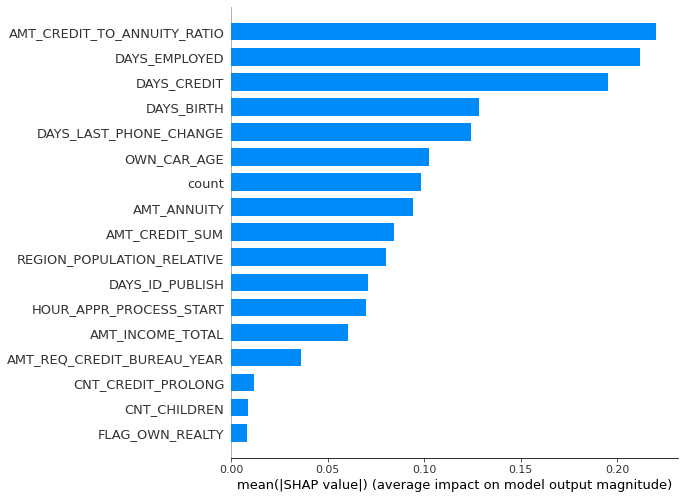

In [28]:
shap.summary_plot(shap_values, train[input_var], plot_type='bar')

시각화 결과, 타겟값에 가장 큰 영향을 미치는 상위 5가지 변수는 아래와 같다.

<ul>
    <li>AMT_CREDIT_TO_ANNUITY_RATIO</li>
    <li>DAYS_EMPLOYED</li>
    <li>DAYS_CREDIT</li>
    <li>DAYS_BIRTH</li>
    <li>DAYS_LAST_PHONE_CHANGE</li>
</ul>

## 2.5 영향을 많이 주는 5개의 변수와 상환 여부와의 관계를 알아본다.

1. AMT_CREDIT_TO_ANNUITY_RATIO

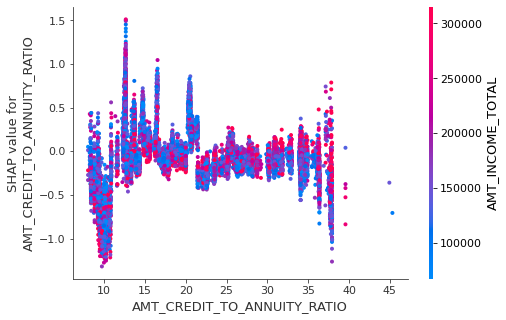

In [29]:
shap.dependence_plot('AMT_CREDIT_TO_ANNUITY_RATIO', shap_values, train[input_var])

대출 상환 기간이 12개월에서 20개월 사이일 때 비교적 상환을 잘 못한다.<br>
반면 12개월 이하, 20개월 이상일 때는 상환을 비교적 잘 한다.

2. DAYS_EMPLOYED

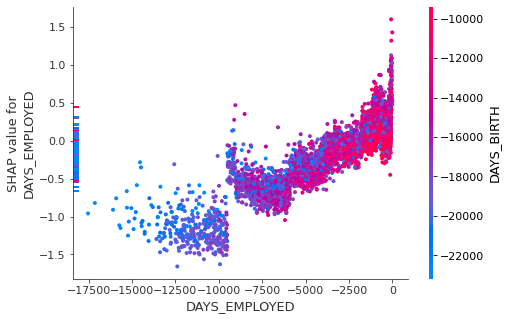

In [30]:
shap.dependence_plot('DAYS_EMPLOYED', shap_values, train[input_var])

취업한지 오래되면 오래될 수록 대출상환확률이 올라간다.<br>
대출일 기준 9000일보다 오래 전에 취업했을 때 대출상환능력이 급상승한다.

3. DAYS_CREDIT

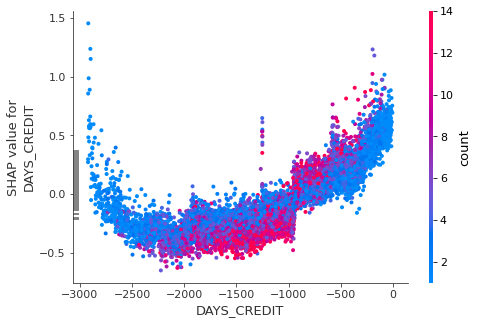

In [31]:
shap.dependence_plot('DAYS_CREDIT', shap_values, train[input_var])

DAYS_CREDIT은 -3000일부터 -2000일까지는 대출상환능력이 상승한다.<br>
그 이후부턴 하락한다.<br>

4. DAYS_BIRTH

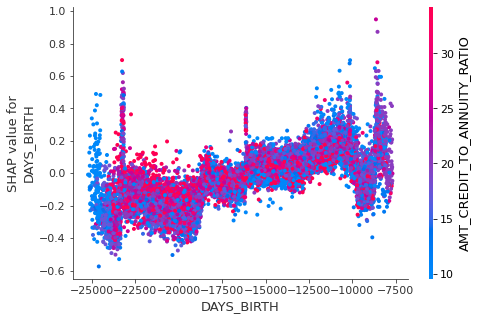

In [32]:
shap.dependence_plot('DAYS_BIRTH', shap_values, train[input_var])

나이가 많으면 많을수록 대출상환을 잘 하는 경향이 있다.

5. DAYS_LAST_PHONE_CHANGE

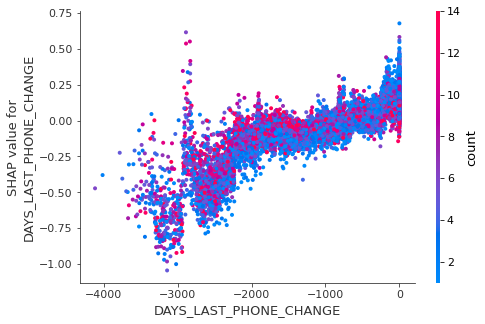

In [33]:
shap.dependence_plot('DAYS_LAST_PHONE_CHANGE', shap_values, train[input_var])

핸드폰을 오래전에 바꾸었을 수록 대출금을 상환할 가능성이 높아진다.

# 3. 결론

1. 대출 상환 기간이 상환여부에 가장 큰 영향을 준다. 해당 영향은 비선형적 관계이다(영향이 크다고 해서 인과관계가 있다고 단정짓긴 어렵다)<br><br>
2. 주택 보유 여부와 자식의 수는 대출 상환능력에 큰 영향을 미치지 않는다.<br><br>
3. 최근에 취업했을 수록, 최근에 대출을 받았을수록, 최근에 핸드폰을 바꿨을 수록, 나이가 어릴수록 대출금 상환 가능성이 낮다.<br>
(DAYS_EMPLOYED, DAYS_CREDIT, DAYS_LAST_PHONE_CHANGE, DAYS_BIRTH가 클수록 대출금 상환 가능성이 낮다)

## 3.1 결론의 3번 시각화 

DAYS_EMPLOYED, DAYS_CREDIT, DAYS_LAST_PHONE_CHANGE, DAYS_BIRTH의 상위 25%, 하위 25% 값 시각화

In [34]:
train['DAYS_EMPLOYED'].quantile(0.75) < train['DAYS_EMPLOYED']

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997     True
19998    False
19999    False
Name: DAYS_EMPLOYED, Length: 20000, dtype: bool

In [35]:
group1 = train.loc[ (train['DAYS_EMPLOYED'].quantile(0.75)< train['DAYS_EMPLOYED']) &
           (train['DAYS_CREDIT'].quantile(0.75)< train['DAYS_CREDIT']) &
           (train['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)< train['DAYS_LAST_PHONE_CHANGE']) &
           (train['DAYS_BIRTH'].quantile(0.75)< train['DAYS_BIRTH']) ]

In [36]:
group2 = train.loc[ (train['DAYS_EMPLOYED'].quantile(0.25)> train['DAYS_EMPLOYED']) &
           (train['DAYS_CREDIT'].quantile(0.25)> train['DAYS_CREDIT']) &
           (train['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)> train['DAYS_LAST_PHONE_CHANGE']) &
           (train['DAYS_BIRTH'].quantile(0.25)> train['DAYS_BIRTH']) ]

In [37]:
group1['group'] = 1
group2['group'] = 0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
full = pd.concat([group1,group2],axis=0)

In [39]:
import seaborn as sns

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='group', ylabel='TARGET'>

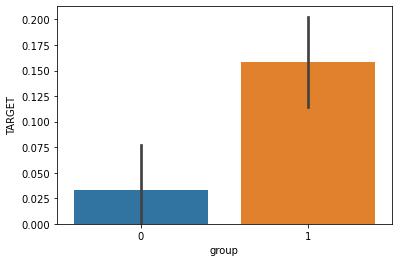

In [40]:
sns.barplot('group','TARGET',data=full)